In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_concentre = pd.read_excel("../INRA2018_TablesConcentres_20122018.xlsx", header=1)
data_fourrage = pd.read_excel("../INRA2018_TablesFourrages_etude_prediction_20241121.xlsx", header=1)

In [3]:
data_fourrage

,No,Etat,Code INRA,Libellé 0,Libellé 1,Libellé 2,Libellé 3,Libellé 4,MS,UFL,...,GlyDI,AlaDI,TyrDI,C14:0,C16:0,C16:1,C18:0,C18:1,C18:2,C18:3
0,1,1,FV0010,FOURRAGES VERTS,"PRAIRIES PERMANENTES, PLAINE (NORMANDIE)",1er cycle,"15-25 avril, déprimage, ST = 172°C",NaN,15.5,1.07,...,6.94,6.87,4.13,1.0,15.68,1.4,2.30,4.04,16.34,54.50
1,2,1,FV0020,FOURRAGES VERTS,"PRAIRIES PERMANENTES, PLAINE (NORMANDIE)",1er cycle,"1-10 mai, pâturage, ST = 298°C",NaN,16.6,1.02,...,6.93,6.88,4.14,1.0,16.36,1.4,2.38,4.19,16.89,52.75
2,3,1,FV0030,FOURRAGES VERTS,"PRAIRIES PERMANENTES, PLAINE (NORMANDIE)",1er cycle,"15-25 mai, début épiaison, ST = 470°C",NaN,17.2,0.94,...,6.80,6.87,4.10,1.0,17.46,1.4,2.49,4.41,17.65,49.96
3,4,1,FV0040,FOURRAGES VERTS,"PRAIRIES PERMANENTES, PLAINE (NORMANDIE)",1er cycle,"1-10 juin, épiaison, ST = 685°C",NaN,20.2,0.84,...,6.81,6.88,4.11,1.0,18.22,1.4,2.56,4.54,18.12,48.04
4,5,1,FV0050,FOURRAGES VERTS,"PRAIRIES PERMANENTES, PLAINE (NORMANDIE)",1er cycle,"15-25 juin, floraison, ST = 903°C",NaN,19.2,0.74,...,6.81,6.89,4.12,1.0,18.79,1.4,2.61,4.63,18.46,46.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,1251,1,FR0080,RACINES ET TUBERCULES,Rutabagas,NaN,Rutabagas,NaN,11.5,1.29,...,6.85,7.00,4.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,1252,1,FR0090,RACINES ET TUBERCULES,Topinambour,NaN,Topinambour,NaN,20.0,1.17,...,6.85,7.00,4.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,1253,1,FR0100,RACINES ET TUBERCULES,Feuilles et collets de betteraves,NaN,Feuilles et collets de betteraves propres,NaN,13.0,0.96,...,7.08,6.77,4.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,1254,1,FR0110,RACINES ET TUBERCULES,Feuilles et collets de betteraves,NaN,Feuilles et collets de betteraves sales,NaN,13.0,0.77,...,7.08,6.76,4.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Histogram plot

## Distribution features

<BarContainer object of 61 artists>

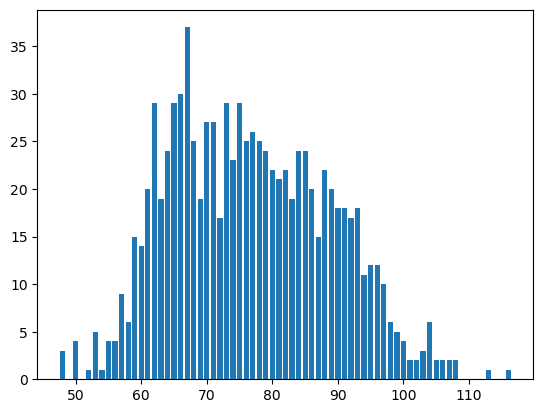

In [4]:
hist = data_fourrage['PDI'].value_counts()

plt.bar(hist.index,hist.values)


In [31]:
print(data_fourrage['Libellé 0'].str.count(',').unique())
print(data_fourrage['Libellé 1'].str.count(',').unique())
print(data_fourrage['Libellé 2'].str.count(',').unique())
print(data_fourrage['Libellé 3'].str.count(',').unique())
print(data_fourrage['Libellé 4'].str.count(',').unique())


[0 1]
[1 2 0]
[ 0.  1.  2. nan]
[2 0 1]
[nan  0.  2.  1.]


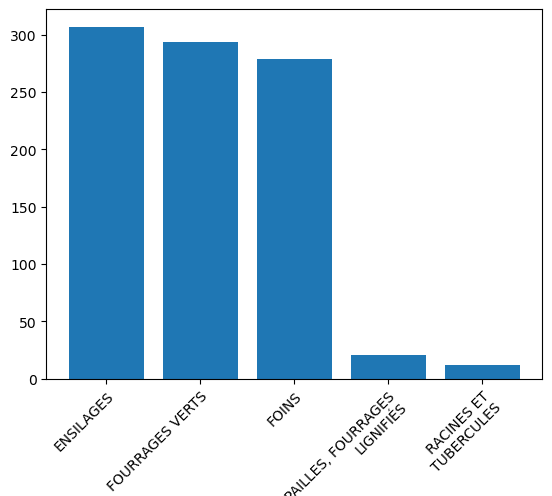

In [6]:
hist = data_fourrage['Libellé 0'].value_counts()

plt.bar(hist.index,hist.values)
plt.xticks(ha='right',rotation=45,wrap=True)
plt.show()

Libellé 0              Libellé 1                                       
ENSILAGES              GRAMINÉES FOURRAGÈRES, RAY-GRASS ANGLAIS            57
FOINS                  GRAMINÉES FOURRAGÈRES, RAY-GRASS ANGLAIS            52
FOURRAGES VERTS        GRAMINÉES FOURRAGÈRES, RAY-GRASS ANGLAIS            37
ENSILAGES              GRAMINÉES FOURRAGÈRES, DACTYLE                      36
                       PRAIRIES PERMANENTES, PLAINE (NORMANDIE)            35
                                                                           ..
                       PROTÉAGINEUX, FÈVEROLE                               1
                       CÉRÉALES PLANTES ENTIÈRES, ORGE                      1
                       CÉRÉALES PLANTES ENTIÈRES, EPIS COMPLETS DE MAÏS     1
                       CÉRÉALES PLANTES ENTIÈRES, BLÉ                       1
RACINES ET TUBERCULES  Topinambour                                          1
Name: count, Length: 81, dtype: int64
Index(['ENSILAGES', 'FOINS', 'FO

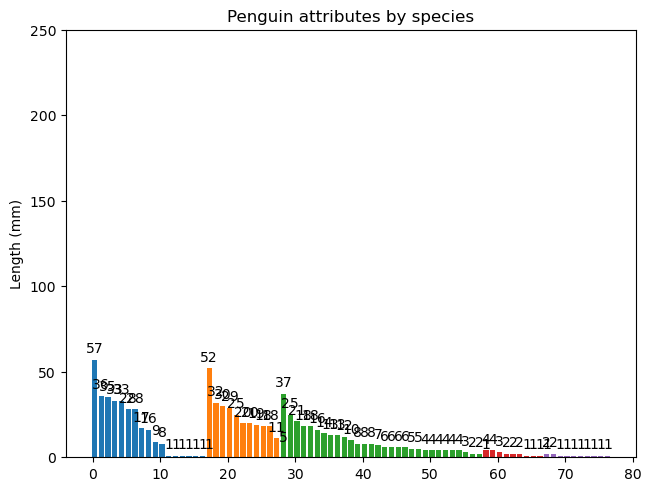

In [7]:
hist = data_fourrage[['Libellé 0','Libellé 1']].value_counts()

  # the label locations
offset = 0.25  # the width of the bars

fig, ax = plt.subplots(layout='constrained')
print(hist)
libell0 = hist.index.get_level_values(0).unique()
print(libell0)
for name in libell0 :
    data = hist.loc[[name]]
    x = np.arange(len(data))
    rects = ax.bar(x + offset, data.values, label=data.keys().get_level_values(1).tolist())
    ax.bar_label(rects, padding=3)
    offset += x[-1]

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Liebllé 1 en fonction des libellées 0')
#ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

# Missing values

['No' 'Etat' 'Code INRA' 'Libellé 0' 'Libellé 1' 'Libellé 2' 'Libellé 3'
 'Libellé 4' 'MS' 'UFL' 'UFV' 'PDIA' 'PDI' 'BPR' 'LysDI' 'MetDI' 'HisDI'
 'NIref' 'UEM' 'UEL' 'UEB' 'MO' 'MM' 'dMO' 'MAT' 'dMA' 'CB' 'dCB' 'NDF'
 'dNDF' 'ADF' 'dADF' 'AG' 'EE' 'P' 'Pabs' 'Ca' 'Caabs' 'Mg' 'BE' 'EB' 'dE'
 'EM' 'DT_N' 'DT6_N' 'dr_N' 'S' 'Na' 'K' 'Cl' 'BACA' 'Cu' 'Zn' 'Mn' 'Co'
 'Se' 'I' 'VitA' 'VitD' 'VitE' 'LysBP' 'HisBP' 'ArgBP' 'ThrBP' 'ValBP'
 'MetBP' 'IleBP' 'LeuBP' 'PheBP' 'AspBP' 'SerBP' 'GluBP' 'ProBP' 'GlyBP'
 'AlaBP' 'TyrBP' 'CysTrpBP' 'LysDI.1' 'HisDI.1' 'ArgDI' 'ThrDI' 'ValDI'
 'MetDI.1' 'IleDI' 'LeuDI' 'PheDI' 'AspDI' 'SerDI' 'GluDI' 'ProDI' 'GlyDI'
 'AlaDI' 'TyrDI' 'C14:0' 'C16:0' 'C16:1' 'C18:0' 'C18:1' 'C18:2' 'C18:3']


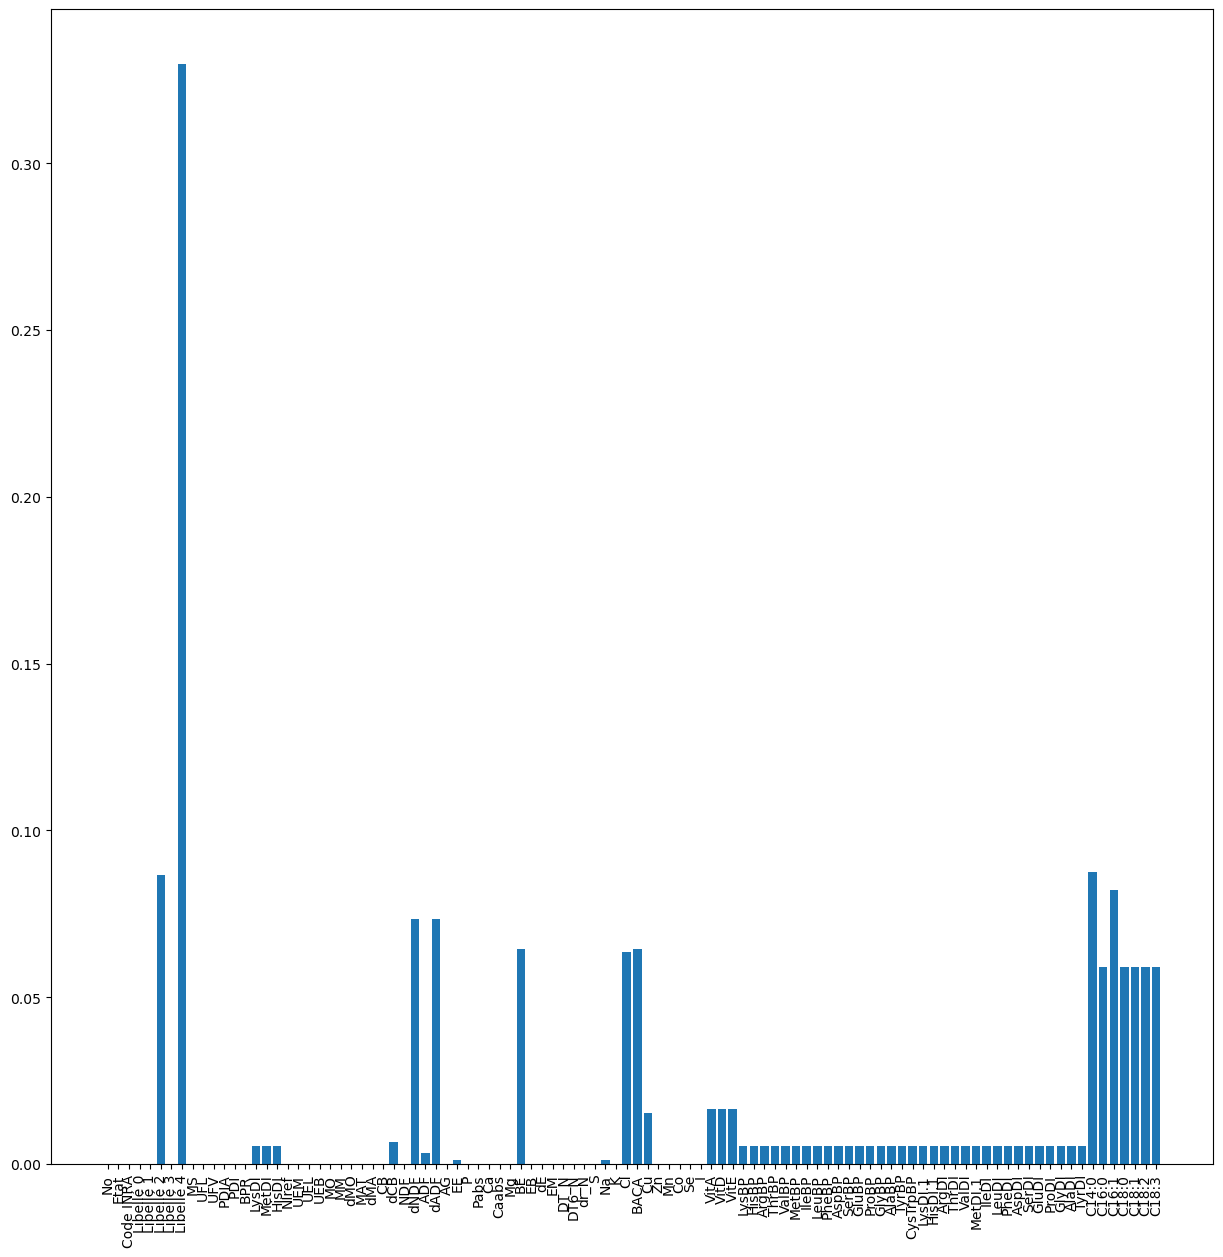

In [8]:
print(data_fourrage.columns.values)

hist = data_fourrage.isna().sum()/data_fourrage.shape[0]

plt.figure(figsize=(15,15))
plt.bar(hist.index, hist.values)
plt.xticks(rotation=90)
plt.show()

             No      Etat        MS       UFL       UFV      PDIA       PDI  \
No     1.000000  0.333943 -0.018229  0.260819  0.264238 -0.005353 -0.044829   
Etat   0.333943  1.000000  0.255629  0.793797  0.794657 -0.170472 -0.265259   
MS    -0.018229  0.255629  1.000000  0.263697  0.259236  0.089564  0.045418   
UFL    0.260819  0.793797  0.263697  1.000000  0.999349  0.037650 -0.033521   
UFV    0.264238  0.794657  0.259236  0.999349  1.000000  0.032193 -0.037517   
...         ...       ...       ...       ...       ...       ...       ...   
C20:0 -0.438985 -0.235001  0.015036 -0.202821 -0.207376  0.202275  0.240821   
C20:1  0.101464 -0.327168 -0.294805 -0.131446 -0.126784  0.363667  0.428911   
C22:0 -0.727835       NaN  0.447863 -0.212931 -0.243377 -0.133316 -0.148502   
C22:1 -0.941035 -0.944417 -0.946504 -0.944417 -0.944413  0.875957  0.918792   
C24:0  0.403209       NaN  0.140691  0.055907  0.040926  0.821767  0.769488   

            BPR     LysDI     MetDI  ...     C16:1 

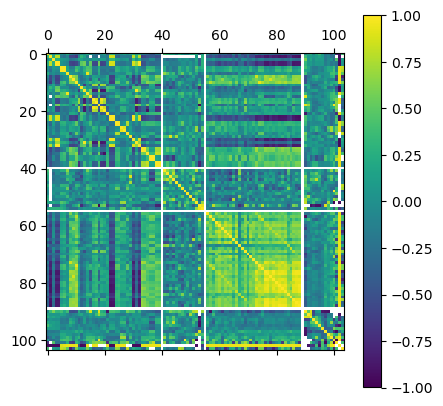

In [9]:
corr = data_concentre.corr(numeric_only=True)
print(corr)
plt.matshow(corr)
plt.colorbar()

<AxesSubplot: >

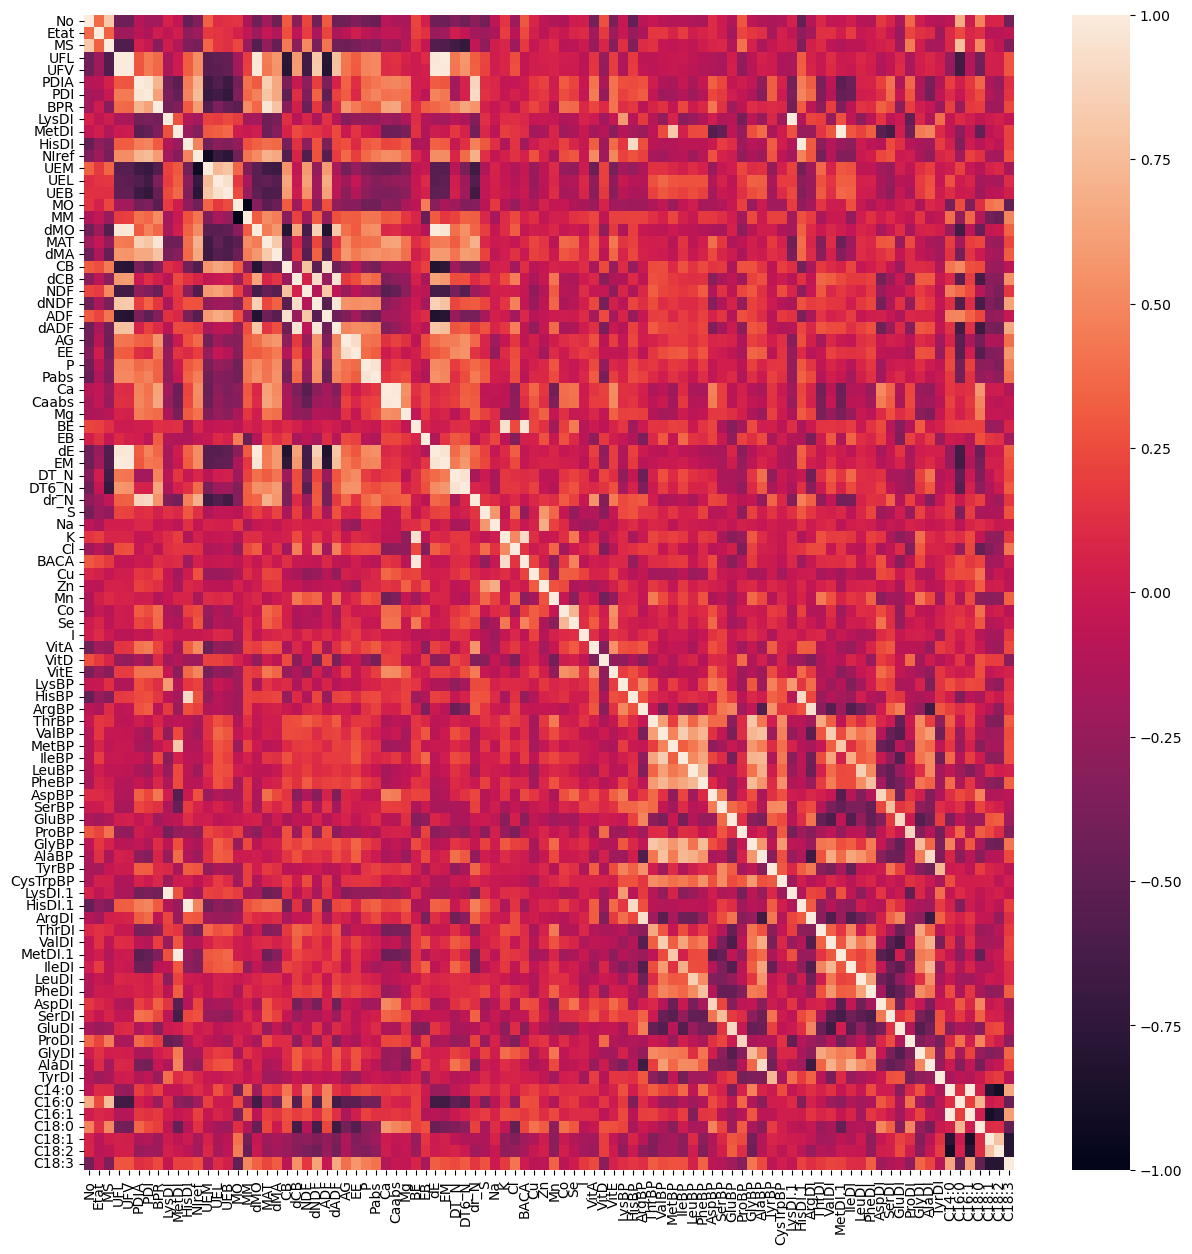

In [10]:
import seaborn as sns
corr = data_fourrage.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

<AxesSubplot: >

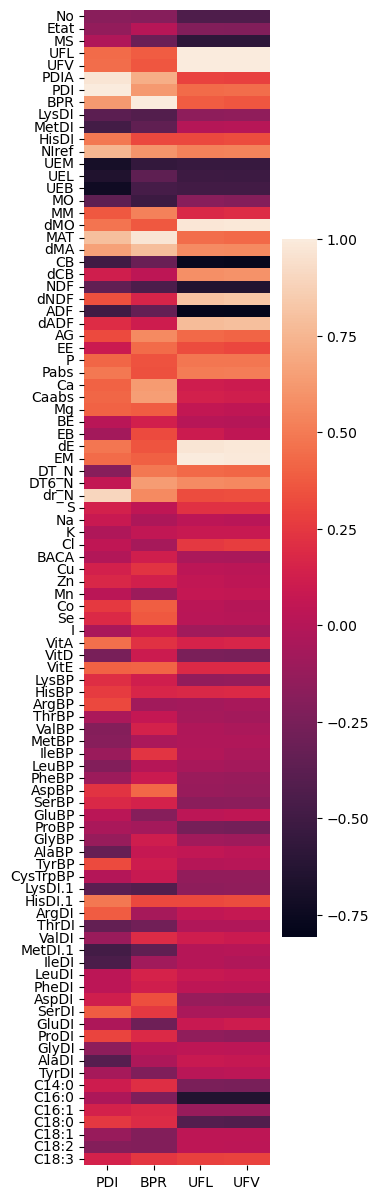

In [11]:
corr = data_fourrage.corr(numeric_only=True)
plt.figure(figsize=(3,15))
corr = corr[['PDI','BPR','UFL','UFV']]
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.index.values)

# Test des modèles

In [10]:
# On s'intéresse seulement aux variables quantitatives


target = ['UFL','UFV','PDI','BPR','PDIA']
predictors = ['MS','MM','MAT','CB','NDF','ADF','EE']

X = data_fourrage[predictors].values
Y = data_fourrage[target].values

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
Y = std.fit_transform(Y)


dict_output = ['UFL','UFV','PDI','BPR','PDIA']



In [11]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, root_mean_squared_error,r2_score

def model_evaluation(y_true,y_pred):
    
    result = {}
    result['MAPE'] = mean_absolute_percentage_error(y_true,y_pred, multioutput='raw_values')
    result['MAE'] = mean_absolute_error(y_true,y_pred, multioutput='raw_values')
    result['RMSE'] = root_mean_squared_error(y_true,y_pred, multioutput='raw_values')
    result['r2'] = r2_score(y_true,y_pred, multioutput='raw_values')

    return result
    

## Tree regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

Y_hat = []
for i in range(len(dict_output)):
    reg = DecisionTreeRegressor()
    reg.fit(X_train,Y_train[:,i])
    Y_hat.append(reg.predict(X_test))

from pickle import dump

with open('tree_regressor.pkl', 'wb') as f:
    dump(reg, f, protocol=5)

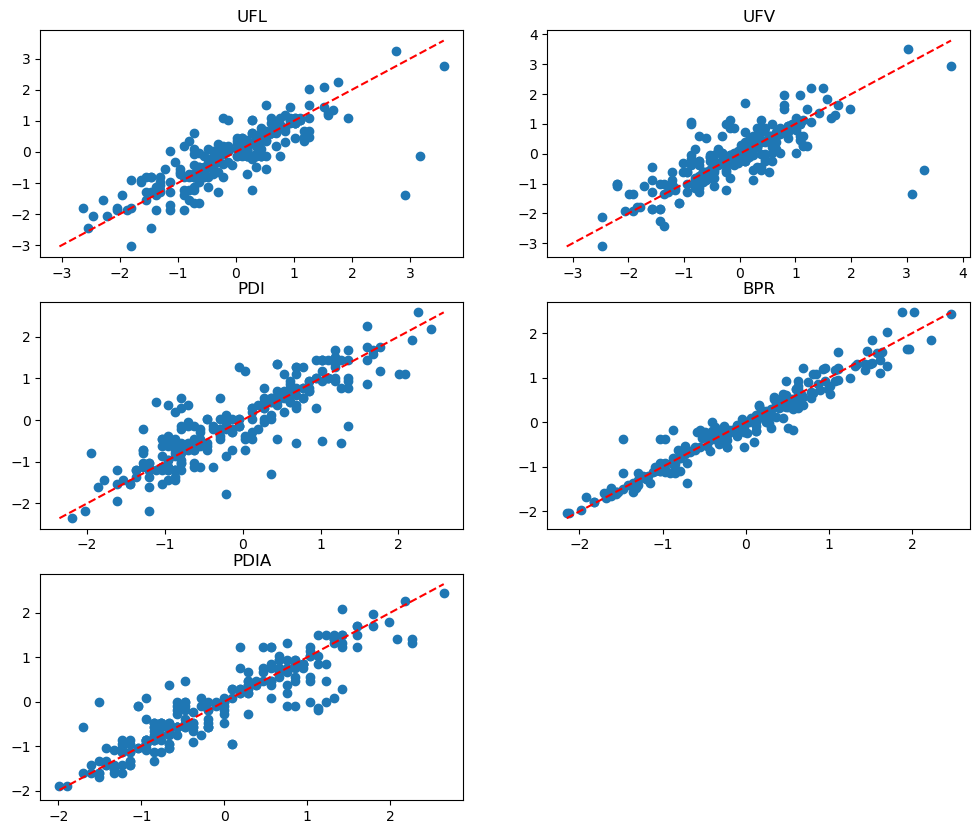

In [24]:
plt.figure(figsize=(12,10))

for i in range(len(Y_hat)):

    plt.subplot(int('32'+str(i+1)))
    plt.title(dict_output[i])
    plt.scatter(Y_test[:,i],Y_hat[i])
    x_draw = np.linspace(min(min(Y_test[:,i]),min(Y_hat[i])),max(max(Y_test[:,i]),max(Y_hat[i])))
    plt.plot(x_draw,x_draw,c='red',ls='--')

plt.show()




{'MAPE': array([1.02766752, 0.99107149, 1.10517668, 0.69210605, 2.42811347]), 'MAE': array([0.36983976, 0.40566244, 0.34546765, 0.15924913, 0.27308254]), 'RMSE': array([0.58753842, 0.65065231, 0.49305752, 0.22845843, 0.40726774]), 'r2': array([0.65537258, 0.57803629, 0.73803247, 0.93974405, 0.82574221])}


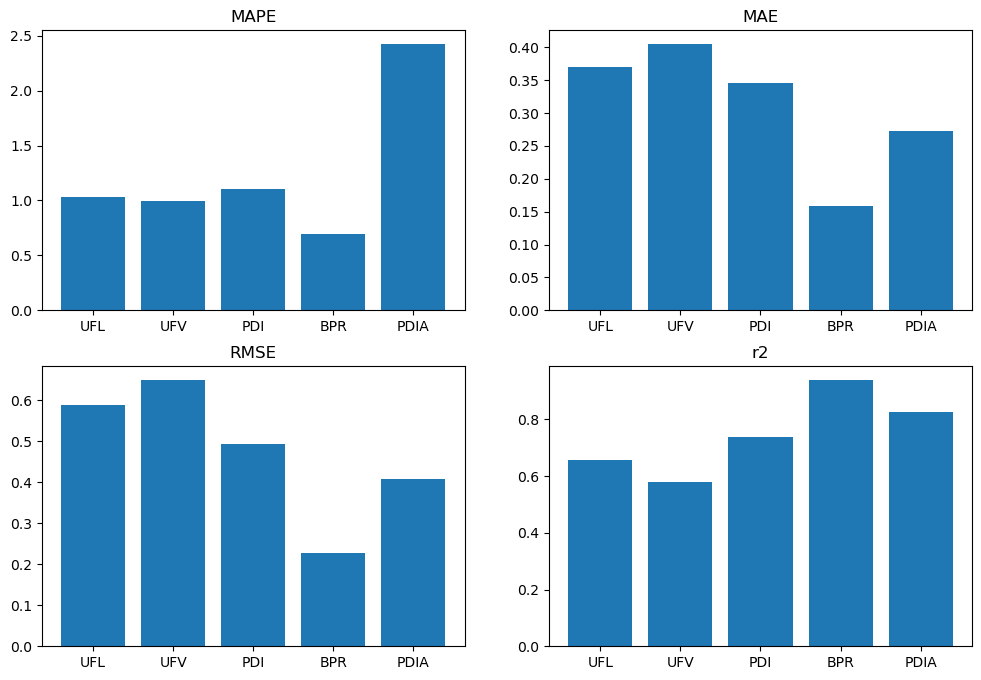

In [25]:
Y_hat = np.array(Y_hat).T
results = model_evaluation(Y_test,Y_hat)
print(results)

plt.figure(figsize=(12,8))

for i in range(len(results)):

    plt.subplot(int('22'+str(i+1)))
    plt.title(list(results.keys())[i])
    plt.bar(dict_output,list(results.values())[i])

plt.show()

## Linear regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### remove row with na, afterward values will be imputed
mask = np.any(pd.isna(X),axis=1)
mask = np.invert(mask)

X,Y = X[mask],Y[mask]

### test/train split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

Y_hat = []
for i in range(len(dict_output)):
    reg = LinearRegression()
    reg.fit(X_train,Y_train[:,i])
    Y_hat.append(reg.predict(X_test))


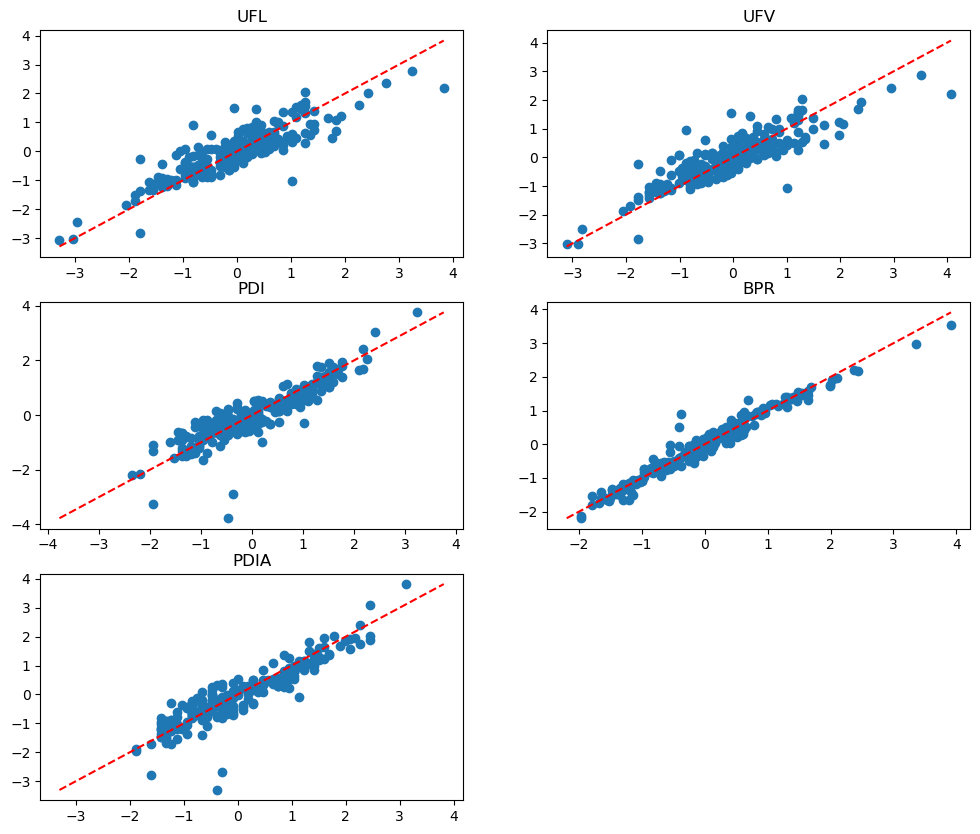

In [29]:
plt.figure(figsize=(12,10))

for i in range(len(Y_hat)):

    plt.subplot(int('32'+str(i+1)))
    plt.title(dict_output[i])
    plt.scatter(Y_test[:,i],Y_hat[i])
    x_draw = np.linspace(min(min(Y_test[:,i]),min(Y_hat[i])),max(max(Y_test[:,i]),max(Y_hat[i])))
    plt.plot(x_draw,x_draw,c='red',ls='--')

plt.show()


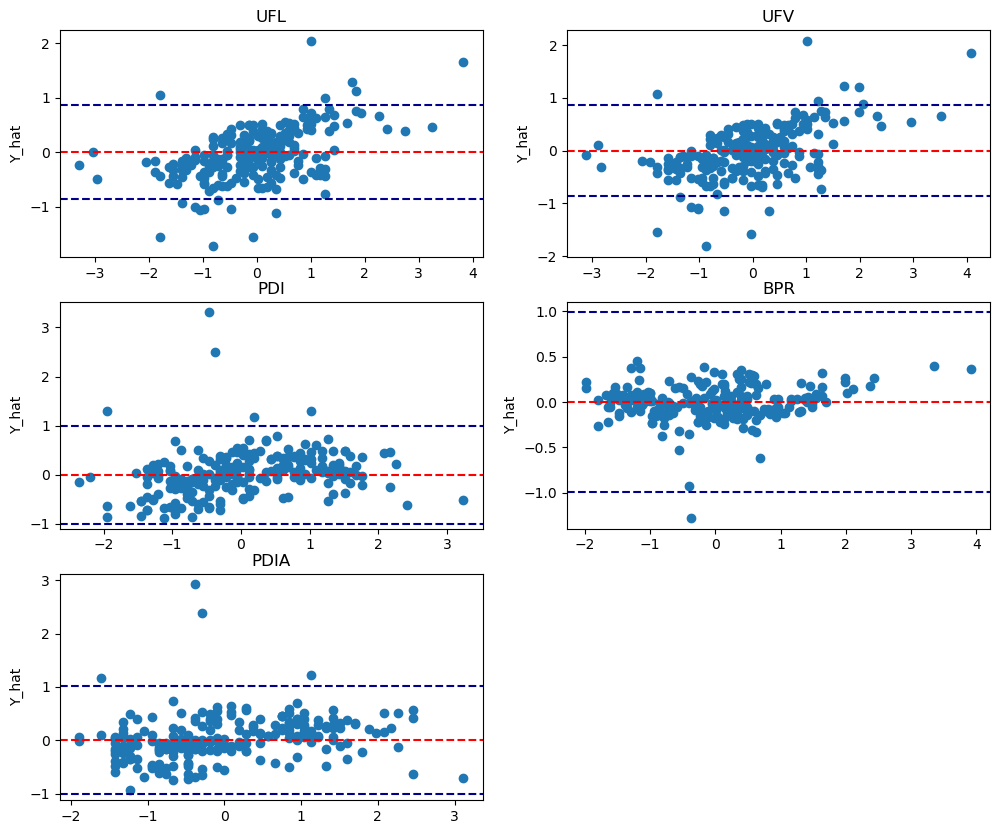

In [31]:
plt.figure(figsize=(12,10))

for i in range(len(Y_hat)):

    plt.subplot(int('32'+str(i+1)))
    plt.title(dict_output[i])
    plt.scatter(Y_test[:,i],Y_test[:,i]-Y_hat[i])
    plt.axhline(c='red',ls='--')
    plt.axhline(np.std(Y_hat[i]),c='darkblue',ls='--')
    plt.axhline(-np.std(Y_hat[i]),c='darkblue',ls='--')
    plt.ylabel('Y_hat')
    

plt.show()


{'MAPE': array([1.26517319, 1.2397575 , 1.11628366, 0.5588306 , 2.40090125]), 'MAE': array([0.36561995, 0.36601295, 0.32390141, 0.13666109, 0.29576723]), 'RMSE': array([0.48795715, 0.49554726, 0.47593415, 0.19620151, 0.42967311]), 'r2': array([0.76140757, 0.75726858, 0.77453726, 0.96115793, 0.82350244])}


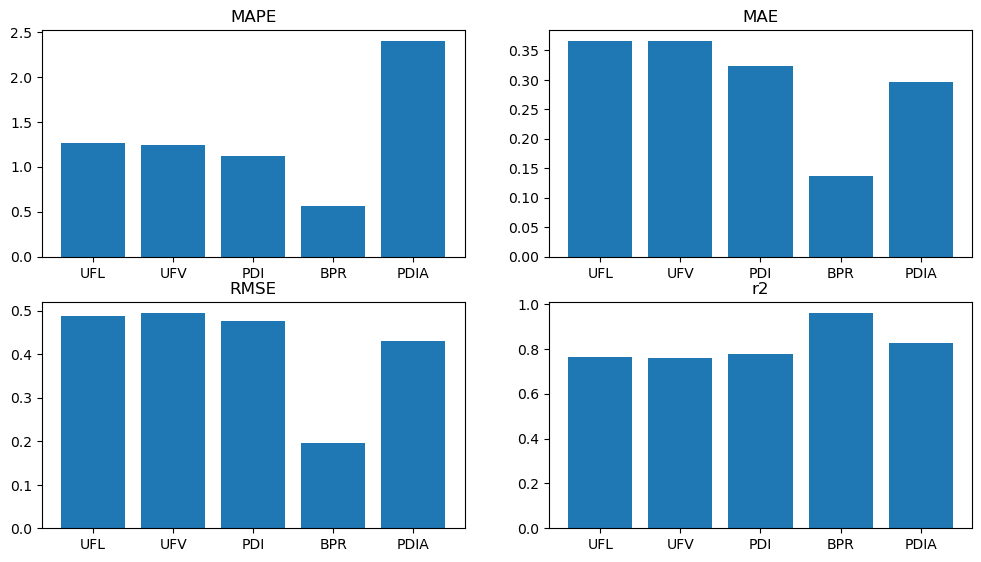

In [32]:
Y_hat = np.array(Y_hat).T
results = model_evaluation(Y_test,Y_hat)
print(results)

plt.figure(figsize=(12,10))

for i in range(len(results)):

    plt.subplot(int('32'+str(i+1)))
    plt.title(list(results.keys())[i])
    plt.bar(dict_output,list(results.values())[i])

plt.show()

## 